# Hypothesis Testing - 1

- **$H_0$:** <br>
There is no statistically significant difference in memory representations between individuals with different levels of specificity during learning.
<br>

- **$H_1$:** <br>
There is a statistically significant difference in memory representations between individuals with different levels of specificity during learning.

#### Importing Libraries

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
from scipy.stats import shapiro

#### Reading Data

In [38]:
# reading subject age data
sub_ages = pd.read_csv('../data/e1/e1_sub_ages.csv')

# Reading learning data
learning_data = pd.read_csv('../data/e1/e1_learning_data.csv')

# Reading memory data
memory_data = pd.read_csv('../data/e1/e1_memory_data.csv')

#### Data Processing

In [39]:
sub_ages.head()

,subject_id,age
0,3768,8.04
1,3770,8.10
2,3855,16.83
3,3853,16.94
4,3898,22.15


In [40]:
sub_ages.shape

(151, 2)

In [41]:
learning_data.head()

,subject_id,task_part,block_condition,block_order,task_block,trial_index,stimulus,cat_type,mean_cat_reward,approach_reward,key_press,rt,points,stimulus_repetition,correct_response,correct_response_made
0,3768,learning,2,1,animals,73,images/horse7.png,neutral,0,2,1,1148.0,2,1,1,1.0
1,3768,learning,2,1,animals,75,images/cow5.png,bad,-3,-4,0,347.0,0,1,0,1.0
2,3768,learning,2,1,animals,77,images/cow8.png,bad,-3,-2,1,618.0,-2,1,0,0.0
3,3768,learning,2,1,animals,79,images/horse7.png,neutral,0,2,1,306.0,2,2,1,1.0
4,3768,learning,2,1,animals,81,images/goat6.png,good,5,8,0,1521.0,0,1,1,0.0


In [42]:
learning_data.shape

(46206, 16)

In [43]:
learning_data['subject_id'].nunique()

151

In [44]:
memory_data.head()

,subject_id,task_part,block_order,block_condition,category_type,num_stim_rep,image,category,task_block,stim_num,correct_mem_response,mem_response,confidence,rt,mem_acc,conf_number,conf_rating,foil_type,memory_delay
0,3768,memory_trial,1,2,old,6.0,horse7.png,horse,animals,7,old,old,definitely,1866.0,1.0,1.0,4.0,old,7.0
1,3768,memory_trial,1,2,old,6.0,cow5.png,cow,animals,5,old,old,definitely,1792.0,1.0,1.0,4.0,old,7.0
2,3768,memory_trial,1,2,old,3.0,cow8.png,cow,animals,8,old,new,definitely,3074.0,0.0,1.0,1.0,old,7.0
3,3768,memory_trial,1,2,old,6.0,goat6.png,goat,animals,6,old,old,definitely,1411.0,1.0,1.0,4.0,old,7.0
4,3768,memory_trial,1,2,old,3.0,goat5.png,goat,animals,5,old,new,maybe,3348.0,0.0,0.0,2.0,old,7.0


In [45]:
memory_data

,subject_id,task_part,block_order,block_condition,category_type,num_stim_rep,image,category,task_block,stim_num,correct_mem_response,mem_response,confidence,rt,mem_acc,conf_number,conf_rating,foil_type,memory_delay
0,3768,memory_trial,1,2,old,6.0,horse7.png,horse,animals,7,old,old,definitely,1866.0,1.0,1.0,4.0,old,7.0
1,3768,memory_trial,1,2,old,6.0,cow5.png,cow,animals,5,old,old,definitely,1792.0,1.0,1.0,4.0,old,7.0
2,3768,memory_trial,1,2,old,3.0,cow8.png,cow,animals,8,old,new,definitely,3074.0,0.0,1.0,1.0,old,7.0
3,3768,memory_trial,1,2,old,6.0,goat6.png,goat,animals,6,old,old,definitely,1411.0,1.0,1.0,4.0,old,7.0
4,3768,memory_trial,1,2,old,3.0,goat5.png,goat,animals,5,old,new,maybe,3348.0,0.0,0.0,2.0,old,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29179,4045,memory_trial,5,2,old,NaN,tree1.png,tree,plants,1,new,old,definitely,732.6,0.0,1.0,4.0,exemplar,7.0
29180,4045,memory_trial,4,1,old,NaN,plane8.png,plane,vehicles,8,new,old,definitely,961.3,0.0,1.0,4.0,exemplar,7.0
29181,4045,memory_trial,4,1,old,NaN,train3.png,train,vehicles,3,new,old,maybe,1127.0,0.0,0.0,3.0,exemplar,7.0
29182,4045,memory_trial,1,2,new,NaN,bed7.png,bed,furniture,7,new,old,maybe,980.3,0.0,0.0,3.0,category,7.0


In [46]:
memory_data.isnull().sum()

subject_id                  0
task_part                   0
block_order                 0
block_condition             0
category_type               0
num_stim_rep            15504
image                       0
category                    0
task_block                  0
stim_num                    0
correct_mem_response        0
mem_response               28
confidence                 28
rt                         28
mem_acc                    28
conf_number                28
conf_rating                28
foil_type                   0
memory_delay              192
dtype: int64

In [47]:
memory_data = memory_data.dropna()

In [48]:
memory_data['subject_id'].nunique()

151

## Statistical Tests

**Chi Square Test**: <br>

##### Justification

- Chi-Square Test is used to determine whether there is a statistically significant difference between two categorical variables.
<br>

- Here, `block condition` and `memory accuracy` are two categorical variables.

In [49]:
from scipy.stats import chi2_contingency

# Create a contingency table from the data
contingency_table = pd.crosstab(memory_data['block_condition'], memory_data['mem_acc'])

# Perform chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)


Chi-Square Statistic: 11.091915600675973
P-value: 0.0008670487376999925


**Effect Size - Cramer's V:**

In [50]:
# Calculate Cramer's V for effect size
n = contingency_table.sum().sum()
cramer_v = np.sqrt(chi2_stat / (n * (min(contingency_table.shape) - 1)))
print("Cramer's V (Effect Size):", cramer_v)

Cramer's V (Effect Size): 0.028580471158901048


#### Visualization

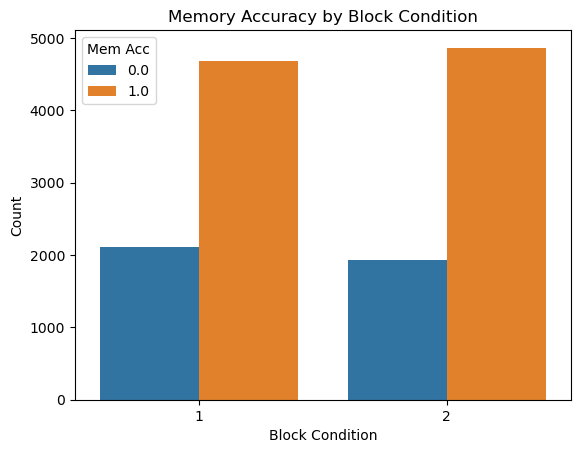

In [51]:
# Plotting a bar chart of memory accuracy by block condition
sns.countplot(x='block_condition', hue='mem_acc', data=memory_data)
plt.title('Memory Accuracy by Block Condition')
plt.xlabel('Block Condition')
plt.ylabel('Count')
plt.legend(title='Mem Acc')
plt.show()

#### Observations

- The `chi-square test` yielded a statistic of $\chi^2 = 11.09$ with a corresponding `p-value` of $p = 0.000867$. This indicates that there is a statistically significant association between block condition and memory accuracy at the $\alpha = 0.05$ level.

<br>

- Furthermore, the `effect size`, measured using `Cramer's V`, was found to be $V = 0.02858$. While this value is relatively small, it does suggest a weak association between block condition and memory accuracy.

<br>

- This can be observed in the `count plot` as well 

### Considering Confidence Level along with Accuracy

**Chi-Square Test**:

In [52]:
from scipy.stats import chi2_contingency

# Create a contingency table from the data
contingency_table = pd.crosstab(memory_data['mem_acc'], [memory_data['block_condition'], memory_data['conf_number']])

# Perform chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print("\nChi-Square Test Results:")
print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)


Chi-Square Test Results:
Chi-Square Statistic: 412.6112314578023
P-value: 4.1055263028742056e-89


#### Observations
- The chi-square test results indicate a highly significant relationship between `memory accuracy`, specificity during learning i.e `block_condition`, and `confidence level` i.e conf_number. 

<br>

- The large chi-square statistic value $412.611$ and the very low p-value (approximately $4.1e-89$) suggest that there is a strong association between these variables.

### Ordinal Approach (Memory Accuracy + Confidence Level)

In [53]:
# new column with weighted values based on mem_acc and conf_number
def assign_weight(row):
    if row['mem_acc'] == 1 and row['conf_number'] == 1:
        return 3  # High weight for correct with high confidence
    elif row['mem_acc'] == 1 and row['conf_number'] == 0:
        return 2  # Medium weight for correct with low confidence
    elif row['mem_acc'] == 0 and row['conf_number'] == 1:
        return 1  # Low weight for incorrect with high confidence
    else:
        return 0  # No weight for incorrect with low confidence

In [54]:
memory_data['weighted_memory'] = memory_data.apply(assign_weight, axis=1)

/tmp/ipykernel_13790/3261153587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  memory_data['weighted_memory'] = memory_data.apply(assign_weight, axis=1)


#### Visualization

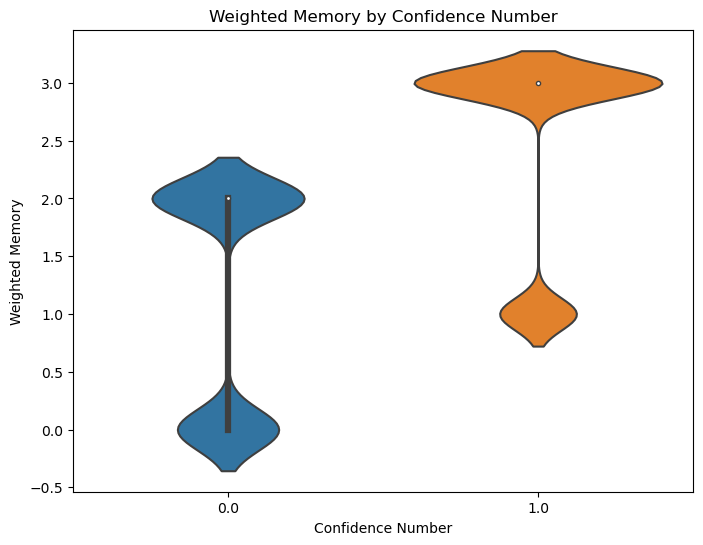

In [85]:
# Violin plot for weighted memory by confidence number
plt.figure(figsize=(8, 6))
sns.violinplot(x='conf_number', y='weighted_memory', data=memory_data)
plt.title('Weighted Memory by Confidence Number')
plt.xlabel('Confidence Number')
plt.ylabel('Weighted Memory')
plt.show()

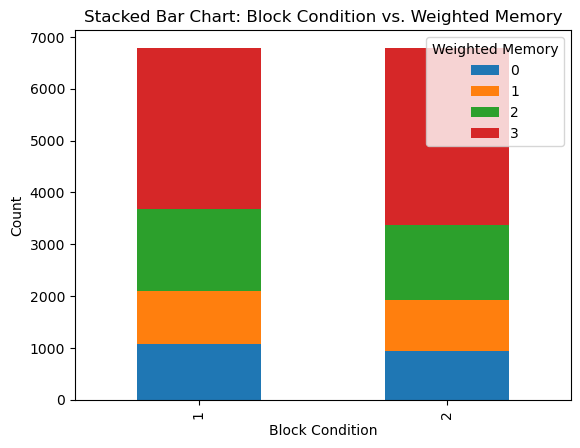

In [95]:
# Stacked bar chart for block condition, weighted memory, and memory accuracy
pd.crosstab(memory_data['block_condition'], memory_data['weighted_memory']).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart: Block Condition vs. Weighted Memory')
plt.xlabel('Block Condition')
plt.ylabel('Count')
plt.legend(title='Weighted Memory')
plt.show()

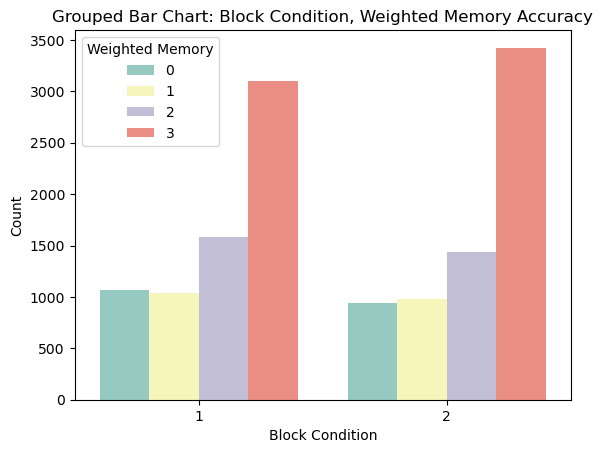

In [96]:
# Grouped bar chart for block condition, weighted memory, and memory accuracy
sns.countplot(x='block_condition', hue='weighted_memory', data=memory_data, palette='Set3')
plt.title('Grouped Bar Chart: Block Condition, Weighted Memory Accuracy')
plt.xlabel('Block Condition')
plt.ylabel('Count')
plt.legend(title='Weighted Memory')
plt.show()

### Normality Test

**Shapiro-Wilk Test**:

In [62]:
shapiro_stat, shapiro_p_val = shapiro(memory_data['weighted_memory'])
print("Shapiro-Wilk Test - Statistic:", shapiro_stat)
print("Shapiro-Wilk Test - P-value:", shapiro_p_val)

Shapiro-Wilk Test - Statistic: 0.7799046039581299
Shapiro-Wilk Test - P-value: 0.0


/home/shreeya/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**Kolmogorov-Smirnov Test**:

In [111]:
# Kolmogorov-Smirnov test for normality
ks_stat, ks_p_val = stats.kstest(memory_data['weighted_memory'], 'norm')
print("Kolmogorov-Smirnov Test - Statistic:", ks_stat)
print("Kolmogorov-Smirnov Test - P-value:", ks_p_val)

Kolmogorov-Smirnov Test - Statistic: 0.6931747777350868
Kolmogorov-Smirnov Test - P-value: 0.0


#### Observations
**Shapiro-Wilk Test**:
   - Statistic: $0.7799046039581299$
   - P-value: $0.0$
   <br>

   - The Shapiro-Wilk test assesses the normality of the weighted memory variable. The low p-value indicates that the data significantly deviates from a normal distribution, suggesting non-normality.
<br><br>

**Kolmogorov-Smirnov Test**:
   - Statistic: $0.6931747777350868$
   - P-value: $0.0$
   <br>

   - The Kolmogorov-Smirnov test also supports the conclusion that the weighted memory variable is not normally distributed.


### Homogenity Test:

**Levene's Test**:

In [63]:
from scipy.stats import levene
levene_stat, levene_p_val = levene(memory_data[memory_data['block_condition'] == 1]['weighted_memory'],
                                   memory_data[memory_data['block_condition'] == 2]['weighted_memory'])
print("Levene's Test - Statistic:", levene_stat)
print("Levene's Test - P-value:", levene_p_val)

Levene's Test - Statistic: 0.16349460996801915
Levene's Test - P-value: 0.6859656525690965


#### Observations
   - Statistic: $0.16349460996801915$
   - P-value: $0.6859656525690965$
   <br>

   - Levene's test checks the homogeneity of variances between block conditions in terms of weighted memory. The high p-value suggests that there is no significant difference in variances between the groups.

#### Mann-Whitney U Test

**Mann-Whitney U Test**:

##### Justification

- Since, data is non parametric, we use Mann-Whitney U Test to determine whether there is a statistically significant difference in memory representations between individuals with different levels of specificity during learning.
<br>

- We do not use Kruskal-Wallis test as we are comparing two groups only.

In [64]:
from scipy.stats import mannwhitneyu

# Separate mem_acc data based on block conditions
block_condition_1 = memory_data[memory_data['block_condition'] == 1]['weighted_memory']
block_condition_2 = memory_data[memory_data['block_condition'] == 2]['weighted_memory']

# Perform Mann-Whitney U test
u_statistic, p_value = mannwhitneyu(block_condition_1, block_condition_2)

print("Mann-Whitney U Statistic:", u_statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("There is a statistically significant difference in memory accuracy between block conditions.")
else:
    print("There is not enough evidence to conclude a statistically significant difference based on the chosen significance level.")


Mann-Whitney U Statistic: 21920093.5
P-value: 1.2032235066187275e-07
There is a statistically significant difference in memory accuracy between block conditions.


#### Observations

   - Statistic: $21920093.5$
   - P-value: $1.2032235066187275 \times 10^{-7}$
   <br>
   
   - The Mann-Whitney U test compares the median scores of weighted memory between two block conditions. The **low p-value** (below $0.05$) suggests a statistically significant difference in memory accuracy between block conditions.

> Mann-Whitney U test indicate a significant difference in memory-related variables between the two block conditions. This suggests that the block condition has an impact on how memory is represented or recalled, as evidenced by the differences in weighted memory and memory accuracy.

#### Bonferroni Correction

- Altough, it not needed as we have only two groups to compare and we are using Mann-Whitney U Test. Post hoc tests are required when we have more than two groups.

In [65]:
from statsmodels.sandbox.stats.multicomp import multipletests

In [66]:
# Correct for multiple comparisons using Bonferroni correction
alpha = 0.05
adjusted_p_values = multipletests([p_value], alpha=alpha, method='bonferroni')[1]

print("Adjusted P-value (Bonferroni corrected):", adjusted_p_values[0])

if adjusted_p_values[0] < alpha:
    print("The difference between block conditions is significant after Bonferroni correction.")
else:
    print("There is no significant difference between block conditions after Bonferroni correction.")

Adjusted P-value (Bonferroni corrected): 1.2032235066187275e-07
The difference between block conditions is significant after Bonferroni correction.


### Regression Analysis

#### Model 1 - Memory Accuracy + Block Condition

In [99]:
import statsmodels.api as sm

X = memory_data[['conf_number', 'block_condition']]
y = memory_data['mem_acc']

In [100]:
# Add a constant to the predictor variable for the intercept term
X = sm.add_constant(X)

# Fit logistic regression model with interaction term
logit_model = sm.Logit(y, X)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.593221
         Iterations 5


In [101]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                mem_acc   No. Observations:                13579
Model:                          Logit   Df Residuals:                    13576
Method:                           MLE   Df Model:                            2
Date:                Tue, 30 Apr 2024   Pseudo R-squ.:                 0.02449
Time:                        02:16:10   Log-Likelihood:                -8055.3
converged:                       True   LL-Null:                       -8257.6
Covariance Type:            nonrobust   LLR p-value:                 1.511e-88
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2644      0.063      4.196      0.000       0.141       0.388
conf_number         0.7623      0.038     19.820      0.000       0.687       0.838
block_condition     0.0973      0.038      2.548      0.011       0.022       0.172
===================================================================================
"""

##### Observations

- The model's pseudo R-squared value is $0.02449$, indicating that about $2.45%$ of the variance in the outcome variable (`mem_acc`) is explained by the predictors in the model.


- Both `conf_number` and `block_condition` are significant predictors of mem_acc at the conventional significance level of $0.05$. 


- **higher confidence levels** and **Exemplar block conditions** being associated with higher memory accuracy

##### Visualization

In [104]:
from scipy.stats import linregress

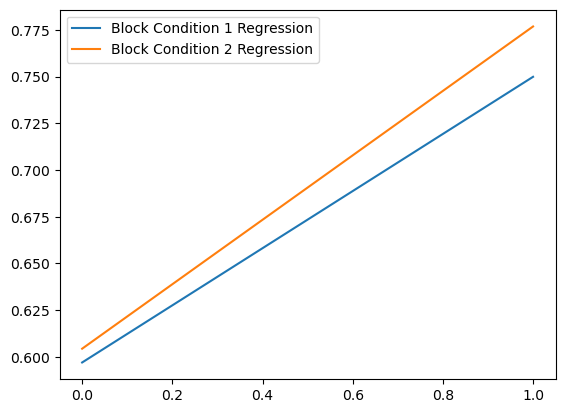

In [103]:
for block_condition, data in memory_data.groupby('block_condition'):
    slope, intercept, _, _, _ = linregress(data['conf_number'], data['mem_acc'])
    x_values = np.linspace(0, 1, 100)
    y_values = intercept + slope * x_values
    plt.plot(x_values, y_values, label=f'Block Condition {block_condition} Regression')

plt.legend()
plt.show()

#### Model 2 - Block Condition

In [97]:
X = memory_data[['block_condition']]
y = memory_data['mem_acc']
# Add a constant to the predictor variable for the intercept term
X = sm.add_constant(X)

# Fit logistic regression model with interaction term
logit_model = sm.Logit(y, X)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.607700
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                mem_acc   No. Observations:                13579
Model:                          Logit   Df Residuals:                    13577
Method:                           MLE   Df Model:                            1
Date:                Tue, 30 Apr 2024   Pseudo R-squ.:               0.0006794
Time:                        02:02:33   Log-Likelihood:                -8252.0
converged:                       True   LL-Null:                       -8257.6
Covariance Type:            nonrobust   LLR p-value:                 0.0008091
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.6746      0.059     11.437      0.000       0.559       0.790
block_condition     0.1259      0.038      3.348      0.001       0.052       0.200
===================================================================================
"""

##### Observations

   - The coefficient for '`block_condition`' is $0.1259$ with a p-value of $0.001$. This indicates that there is a statistically significant positive relationship between '`block_condition`' and memory accuracy.
   - The intercept (constant) term is $0.6746$ with a very low p-value ($< 0.001$), indicating that when '`block_condition`' is zero, the log odds of memory accuracy are significantly different from zero.

   - For every unit increase in '`block_condition`,' the log odds of memory accuracy increase by $0.1259$ units. This suggests that participants in higher '`block_condition`' levels tend to have higher memory accuracy compared to those in lower '`block_condition`' levels.

   - The pseudo R-squared value of $0.0006794$ indicates that the model explains only a very small proportion of the variance in memory accuracy. This suggests that other factors not included in the model may also influence memory accuracy.

   - The LLR (Likelihood Ratio) p-value of $0.0008091$ indicates that the logistic regression model as a whole is statistically significant. This implies that '`block_condition`' is indeed a significant predictor of memory accuracy in the model.

   - The effect size (as indicated by the coefficient) is relatively small ($0.1259$), suggesting that '`block_condition`' alone may not explain a substantial portion of the variability in memory accuracy.